Analysis 3:  
Is the life expectancy affected by type of energy consumption (renewable vs fossil fuels) globally?

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# check the df
data_df.head()

,Unnamed: 0,Location,Year,population,fossil_energy_per_capita,renewables_energy_per_capita,energy_per_capita,Record Counter,LEx,LE15,LE65,LE80
0,87,Africa,1965,321447378.0,2100.505,127.918,2228.423,27,43.4401,45.7137,11.2665,4.9844
1,88,Africa,1966,329658389.0,2136.364,139.123,2275.487,27,43.4330,45.6340,11.2447,4.9787
2,89,Africa,1967,338159967.0,2099.772,141.577,2241.349,27,43.6456,45.5410,11.2492,4.9786
3,90,Africa,1968,346980412.0,2145.930,161.394,2307.324,27,44.1023,45.8270,11.3158,4.9931
4,91,Africa,1969,356070643.0,2126.871,183.537,2310.408,27,44.3156,45.8841,11.3276,4.9919


In [3]:
# Reduce df to only columns needed for this analysis
# Only keep year, energy source, and LEx
reduced_df = data_df[["Year", "fossil_energy_per_capita", "renewables_energy_per_capita", "LEx"]]
reduced_df.head()

# Description of the columns:
# - Year: year in which survey was conducted.
# - fossil_energy_per_capita: Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
# - renewables_energy_per_capita: Per capita primary energy consumption from renewables, measured in kilowatt-hours
# - LEx: Life expectancy (as assessed from time of birth)

,Year,fossil_energy_per_capita,renewables_energy_per_capita,LEx
0,1965,2100.505,127.918,43.4401
1,1966,2136.364,139.123,43.4330
2,1967,2099.772,141.577,43.6456
3,1968,2145.930,161.394,44.1023
4,1969,2126.871,183.537,44.3156


In [4]:
# Rename the headers to be more explanatory and export to a csv
energy_sources_LE_df = reduced_df.rename(columns={"fossil_energy_per_capita": "Fossil Fuel Energy Sources",
                                        "renewables_energy_per_capita": "Renewable Energy Sources",
                                        "LEx" : "Life Expectancy From Birth"})
energy_sources_LE_df.to_csv("energyLEclean_NA_energy_sources", index = False)
energy_sources_LE_df.head()

,Year,Fossil Fuel Energy Sources,Renewable Energy Sources,Life Expectancy From Birth
0,1965,2100.505,127.918,43.4401
1,1966,2136.364,139.123,43.4330
2,1967,2099.772,141.577,43.6456
3,1968,2145.930,161.394,44.1023
4,1969,2126.871,183.537,44.3156


In [5]:
energy_sources_LE_df.tail()

,Year,Fossil Fuel Energy Sources,Renewable Energy Sources,Life Expectancy From Birth
3547,2018,17641.861,2471.564,72.5759
3548,2019,17528.213,2573.853,72.7897
3549,2020,16509.020,2695.399,72.0361
3550,2021,17268.938,2822.497,71.0479
3551,2022,17208.133,2990.389,71.7135


In [6]:
# Group by years for sums and averages per year

# Global Fossil Fuels Groupby
global_fossil_fuels = energy_sources_LE_df.groupby("Year")["Fossil Fuel Energy Sources"].sum()
global_fossil_fuels_sum = global_fossil_fuels.reset_index(drop=True)

# Global Renewable Fuels Groupby
global_renewable_fuels = energy_sources_LE_df.groupby("Year")["Renewable Energy Sources"].sum()
global_renewable_fuels_sum = global_renewable_fuels.reset_index(drop=True)

# Global average LE by year
global_LE = energy_sources_LE_df.groupby("Year")["Life Expectancy From Birth"].mean()
global_avg_LE = global_LE.reset_index(drop=True)

# years
years_array = energy_sources_LE_df["Year"].unique()
years = years_array.tolist()


In [7]:
# Create New Dataframe with above groupby values

global_energy_by_year_df = pd.DataFrame({"Year" : years,
                             "Fossil Fuel Energy Sources" : global_fossil_fuels_sum,
                             "Renewable Energy Sources" : global_renewable_fuels_sum,
                             "Life Expectancy From Birth" : global_avg_LE})

global_energy_by_year_df

,Year,Fossil Fuel Energy Sources,Renewable Energy Sources,Life Expectancy From Birth
0,1965,878274.836,57642.630,60.983631
1,1966,888484.288,60598.596,61.480931
2,1967,903803.222,60240.983,61.791474
3,1968,977126.268,75351.933,62.317070
4,1969,1042820.928,79320.044,62.653859
5,1970,1125536.587,99541.047,63.005283
6,1971,1140679.116,99740.976,62.562743
7,1972,1181842.201,102385.753,63.662283
8,1973,1237245.716,104334.846,63.996272
9,1974,1261487.088,121182.975,64.519863


In [8]:
# Set variables to graph for 1965
global_fossil_1965 = (global_energy_by_year_df.loc[0]["Fossil Fuel Energy Sources"])
global_renewable_1965 = (global_energy_by_year_df.loc[0]["Renewable Energy Sources"])
global_LE_1965 = (global_energy_by_year_df.loc[0]["Life Expectancy From Birth"])

# Set variables to graph for 2022
global_fossil_2022 = (global_energy_by_year_df.loc[57]["Fossil Fuel Energy Sources"])
global_renewable_2022 = (global_energy_by_year_df.loc[57]["Renewable Energy Sources"])
global_LE_2022 = (global_energy_by_year_df.loc[57]["Life Expectancy From Birth"])


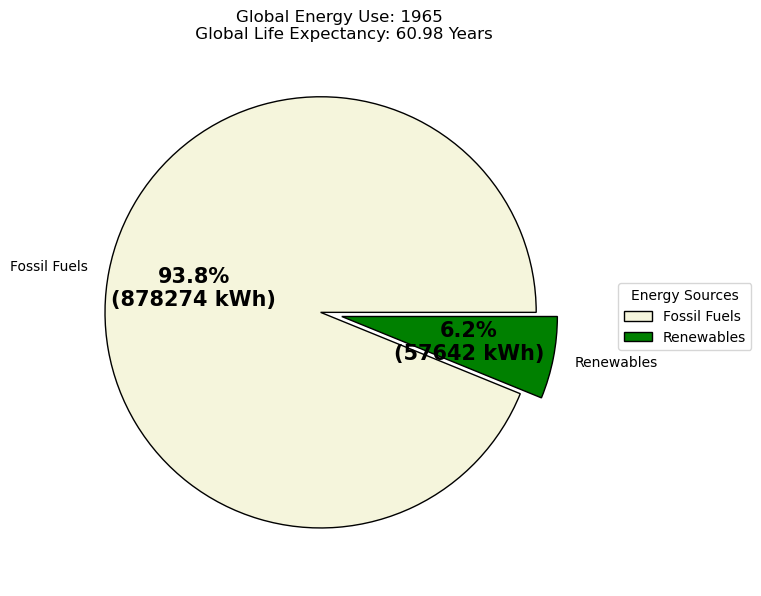

In [9]:
# graphs 1965
# Acknowledgement: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# primary energy sources (world) 1965

labels = ["Fossil Fuels", "Renewables"]
data = [global_fossil_1965, global_renewable_1965]
explode = (0.1, 0.0)
colors = ("beige", "green")

# wedge properties
wp = {'linewidth' : 1, 'edgecolor' : "black"}

# create autopct arguments
def func(pct, allvalues) :
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} kWh)".format(pct, absolute)

fig1, fig_1965 = plt.subplots(figsize = (10, 7))
wedges, texts, autotexts = fig_1965.pie(data,
                                        autopct = lambda pct : func(pct, data),
                                        explode = explode,
                                        labels = labels,
                                        shadow = False,
                                        colors = colors,
                                        startangle = 0,
                                        wedgeprops = wp,
                                        textprops = dict(color = "black"))

# add legend
fig_1965.legend(wedges, labels,
                title = "Energy Sources",
                loc = "center left",
                bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
fig_1965.set_title(f"Global Energy Use: 1965 \n Global Life Expectancy: {global_LE_1965:.2f} Years")

# show plot
plt.show()





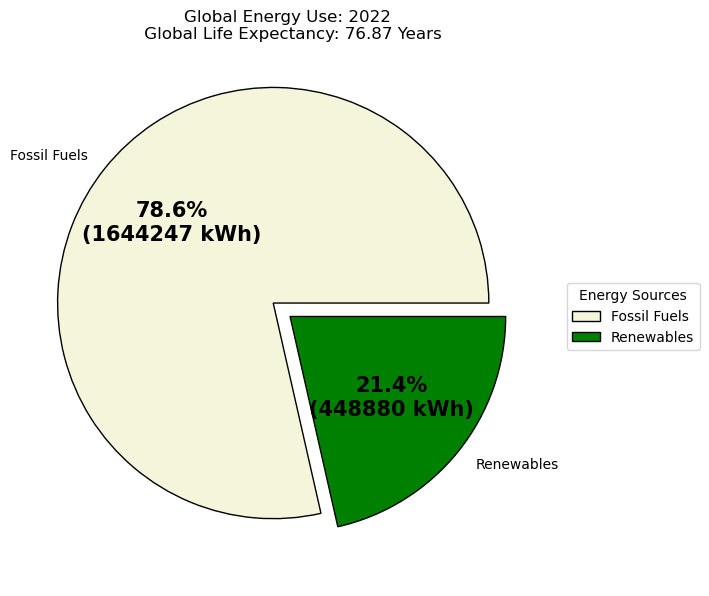

In [10]:
# graphs 2022
# Acknowledgement: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# primary energy sources (world) 1965

labels = ["Fossil Fuels", "Renewables"]
data = [global_fossil_2022, global_renewable_2022]
explode = (0.1, 0.0)
colors = ("beige", "green")

# wedge properties
wp = {'linewidth' : 1, 'edgecolor' : "black"}

# create autopct arguments
def func(pct, allvalues) :
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} kWh)".format(pct, absolute)

fig2, fig_1965 = plt.subplots(figsize = (10, 7))
wedges, texts, autotexts = fig_1965.pie(data,
                                        autopct = lambda pct : func(pct, data),
                                        explode = explode,
                                        labels = labels,
                                        shadow = False,
                                        colors = colors,
                                        startangle = 0,
                                        wedgeprops = wp,
                                        textprops = dict(color = "black"))

# add legend
fig_1965.legend(wedges, labels,
                title = "Energy Sources",
                loc = "center left",
                bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
fig_1965.set_title(f"Global Energy Use: 2022 \n Global Life Expectancy: {global_LE_2022:.2f} Years")

# show plot
plt.show()

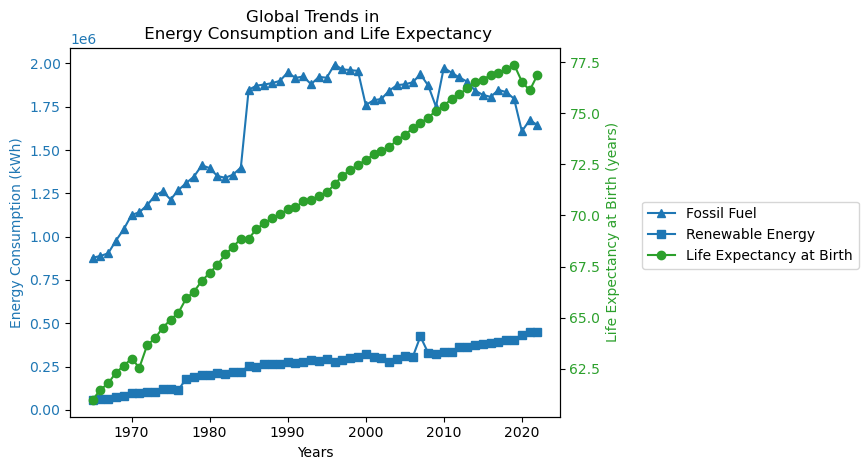

In [11]:
# Graph Life Expectancy, fossil Fuel Use, and Renewable Energy Use over time
# Acknowledgement: Thank you Cassia Yoon!
fig3, general_global_trends = plt.subplots()

color = 'tab:blue'
general_global_trends.set_xlabel('Years')
general_global_trends.set_ylabel('Energy Consumption (kWh)', color=color)
general_global_trends.set_title("Global Trends in \n Energy Consumption and Life Expectancy")
general_global_trends.plot(years, global_fossil_fuels_sum , color=color, marker='^', label='Fossil Fuel')
general_global_trends.plot(years, global_renewable_fuels_sum, color=color, marker='s', label='Renewable Energy')
general_global_trends.tick_params(axis='y', labelcolor=color)

general_global_trends_2 = general_global_trends.twinx()  # create a second axes that shares the same x-axis

color = 'tab:green'
general_global_trends_2.set_ylabel('Life Expectancy at Birth (years)', color=color)
general_global_trends_2.plot(years, global_avg_LE, color=color, marker='o', label='Life Expectancy at Birth')
general_global_trends_2.tick_params(axis='y', labelcolor=color)

fig3.tight_layout()
fig3.legend(bbox_to_anchor = (1.0, .5), loc='center left')
plt.show()
